In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [15]:
file2 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# print(data.head(31))
data.head(31) # plt.savefig("DistbinnedJLA.png")

,z,$D_L$
0,0.010000,32.953887
1,0.011762,33.879003
2,0.013833,33.842141
3,0.016270,34.118567
4,0.019136,34.593446
5,0.022507,34.939027
6,0.026472,35.252096
7,0.031135,35.748502
8,0.036620,36.069788
9,0.043071,36.434570


In [3]:
shuffle = [x for x in range(len(data.values)) if x%2 == 0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]

In [4]:
z = data[:,0]
dl = data[:,1:]

In [5]:
dl

array([[32.95388698],
       [33.84214074],
       [34.59344598],
       [35.25209633],
       [36.06978761],
       [36.65111059],
       [37.43017325],
       [38.25325404],
       [39.06785071],
       [39.79214362],
       [40.56495606],
       [41.42141744],
       [42.23146107],
       [43.05273149],
       [43.97257341],
       [44.82186746],
       [33.87900347],
       [34.11856704],
       [34.93902653],
       [35.74850165],
       [36.43457047],
       [37.15801411],
       [37.95661635],
       [38.61286934],
       [39.3414019 ],
       [40.1565346 ],
       [40.90528778],
       [41.79092346],
       [42.61704707],
       [43.50415083],
       [44.51408758]])

In [6]:
# scalerz = StandardScaler()
# # scalerz = MinMaxScaler(feature_range=(-1,1))
# # fit scaler on data
# scalerz.fit(z.reshape(-1,1))
# # apply transform
# z = scalerz.transform(z.reshape(-1,1))

In [7]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
scalerz = StandardScaler()
scalerz.fit(z.reshape(-1, 1))
zz = scalerz.transform(z.reshape((-1,1)))
z_train, z_test = np.split(zz, indx)
dl_train, dl_test = np.split(dl, indx)

In [8]:
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                    min_delta=0.0,
#                                    patience=20,
#                                    restore_best_weights=True)]

In [9]:
def model(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
    x = Dense(50, activation='relu')(efirst)
    x = Dense(50, activation='relu')(x)
    x = Dense(30, activation='relu')(x)

    elast = Dense(1, activation='linear')(x)
    return elast

batch_size = 1
epochs = 1000
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
___________________________________________________________

In [10]:
model_train = neural_model.fit(z_train, dl_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, dl_test))
#                                     callbacks=callbacks)

Epoch 1/500
24/24 [==============================] - 1s 15ms/step - loss: 1487.9907 - val_loss: 1734.3903
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 1403.9493 - val_loss: 1666.8937
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 1184.1820 - val_loss: 1445.9603
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 752.6900 - val_loss: 871.6848
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 290.4676 - val_loss: 432.3813
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 226.8744 - val_loss: 298.3176
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 120.9726 - val_loss: 193.5967
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 78.3331 - val_loss: 164.8927
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 73.1116 - val_loss: 141.0574
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - 

24/24 [==============================] - 0s 2ms/step - loss: 1.0496 - val_loss: 0.7825
Epoch 83/500
24/24 [==============================] - 0s 2ms/step - loss: 1.3576 - val_loss: 0.3255
Epoch 84/500
24/24 [==============================] - 0s 2ms/step - loss: 0.8738 - val_loss: 0.7842
Epoch 85/500
24/24 [==============================] - 0s 2ms/step - loss: 1.0689 - val_loss: 0.4346
Epoch 86/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7561 - val_loss: 0.2547
Epoch 87/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5994 - val_loss: 0.6995
Epoch 88/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7806 - val_loss: 0.4330
Epoch 89/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6752 - val_loss: 1.9948
Epoch 90/500
24/24 [==============================] - 0s 2ms/step - loss: 1.0638 - val_loss: 0.3027
Epoch 91/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7222 - val_loss: 0.3368
Epoch 92/500


24/24 [==============================] - 0s 2ms/step - loss: 0.4588 - val_loss: 0.1310
Epoch 164/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6643 - val_loss: 0.2279
Epoch 165/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5729 - val_loss: 1.0721
Epoch 166/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4934 - val_loss: 0.9741
Epoch 167/500
24/24 [==============================] - 0s 2ms/step - loss: 0.8834 - val_loss: 0.8855
Epoch 168/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9813 - val_loss: 0.0366
Epoch 169/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4883 - val_loss: 0.2468
Epoch 170/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6372 - val_loss: 0.0935
Epoch 171/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5549 - val_loss: 0.0742
Epoch 172/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3572 - val_loss: 0.2462
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.2587 - val_loss: 0.3460
Epoch 245/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3038 - val_loss: 0.1080
Epoch 246/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5896 - val_loss: 0.4955
Epoch 247/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3670 - val_loss: 0.2010
Epoch 248/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3806 - val_loss: 0.5883
Epoch 249/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4965 - val_loss: 0.0560
Epoch 250/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2796 - val_loss: 0.4584
Epoch 251/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6135 - val_loss: 0.1988
Epoch 252/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6352 - val_loss: 0.3988
Epoch 253/500
24/24 [==============================] - 0s 2ms/step - loss: 0.8215 - val_loss: 0.7369
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 1.0132 - val_loss: 1.0632
Epoch 326/500
24/24 [==============================] - 0s 2ms/step - loss: 1.9588 - val_loss: 0.4350
Epoch 327/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6995 - val_loss: 0.2470
Epoch 328/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2770 - val_loss: 0.2162
Epoch 329/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1359 - val_loss: 0.4849
Epoch 330/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3359 - val_loss: 0.0711
Epoch 331/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.3233
Epoch 332/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4462 - val_loss: 0.0951
Epoch 333/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1366 - val_loss: 0.1230
Epoch 334/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2294 - val_loss: 0.0727
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.2572 - val_loss: 0.1976
Epoch 407/500
24/24 [==============================] - 0s 2ms/step - loss: 0.4593 - val_loss: 0.1390
Epoch 408/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3775 - val_loss: 1.1257
Epoch 409/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7198 - val_loss: 1.0263
Epoch 410/500
24/24 [==============================] - 0s 2ms/step - loss: 0.9062 - val_loss: 0.0164
Epoch 411/500
24/24 [==============================] - 0s 2ms/step - loss: 0.3317 - val_loss: 0.0065
Epoch 412/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1603 - val_loss: 0.0678
Epoch 413/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1709 - val_loss: 0.1029
Epoch 414/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2620 - val_loss: 0.0262
Epoch 415/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1043 - val_loss: 0.1638
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.2073 - val_loss: 0.2454
Epoch 488/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1865 - val_loss: 0.0573
Epoch 489/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1337 - val_loss: 0.1461
Epoch 490/500
24/24 [==============================] - 0s 2ms/step - loss: 0.0978 - val_loss: 0.1737
Epoch 491/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.2505
Epoch 492/500
24/24 [==============================] - 0s 2ms/step - loss: 0.0995 - val_loss: 0.0190
Epoch 493/500
24/24 [==============================] - 0s 2ms/step - loss: 0.1021 - val_loss: 0.0620
Epoch 494/500
24/24 [==============================] - 0s 2ms/step - loss: 0.2367 - val_loss: 4.4280
Epoch 495/500
24/24 [==============================] - 0s 2ms/step - loss: 1.8313 - val_loss: 0.6252
Epoch 496/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6375 - val_loss: 0.1986
Epoc

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

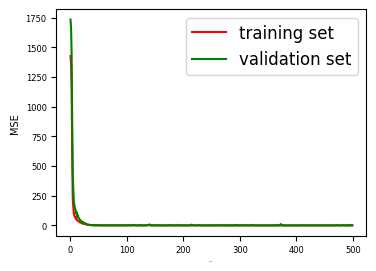

In [11]:
plt.figure(figsize=(4, 3), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=7)
plt.xlabel('Epoch', fontsize=1)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [12]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]
# 300 ep (0.5874642133712769, 0.2920302748680115, 0.8262724280357361)
# 500 ep (0.5158745050430298, 1.0162559747695923, 0.4327618181705475)

(0.5158745050430298, 1.0162559747695923, 0.4327618181705475)

In [27]:
# ranz = np.random.uniform(np.min(z), np.max(z), size=31)
# ranz = np.linspace(np.min(z), np.max(z), 31)
# ranz = np.linspace(np.min(z), np.max(z), 31)
# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
ranz = z
ranzz = zz
pred_random = neural_model.predict(ranzz)
# pred_random

In [28]:
# fake_data = np.concatenate((ranz.reshape(-1,1), pred_random), axis=1)
# np.savetxt("fake_binned_JLA.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu")

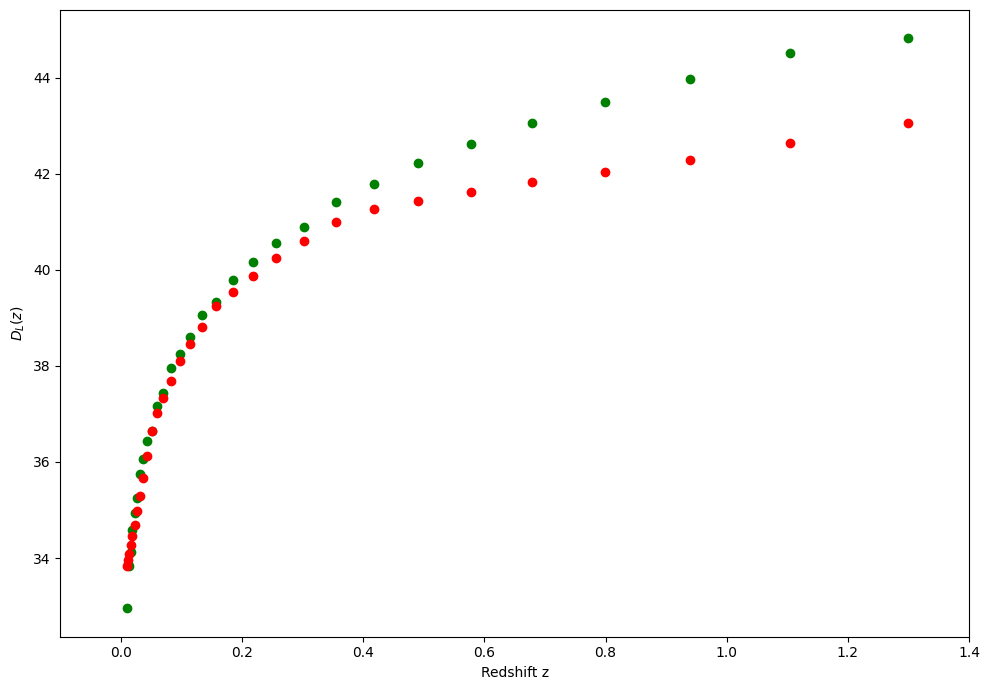

In [29]:
plt.figure(figsize=(10, 7), dpi=100)

plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(ranz, pred_random, c='r', label='Synthetic data with errors')
# plt.errorbar(z, dl, yerr=errors, fmt='g.', markersize=10, label='Observations')
# plt.errorbar(ranz, pred_random, 
#              yerr=fakeerrors, fmt='r.', markersize=10., label='Synthetic data with errors')

# plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(z, Hlcdm(z, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$D_L(z)$")
plt.xlim(-0.1, np.max(z)+0.1)
plt.tight_layout()
# plt.legend()
# plt.savefig('fake_vs_binned_jla.png', dpi=200)

In [ ]:
fake_datadf = pd.DataFrame(fake_data, columns=['z', '$D_L$'])
sns.pairplot(fake_datadf, diag_kind="kde")
# plt.savefig('fake_binned_jla.png')